# Stock Price Prediction

In [1]:
# Processing and analyzing intraday stock price data of three companies (AAPL, CSCO, GE)
# Selects the timestamp and closing price columns.
# Converts the timestamp to datetime and then extracts date and time components.
import datetime
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from itertools import product
from collections import defaultdict
from sklearn.preprocessing import StandardScaler


S1 = pd.read_csv("G:/UH/S2/MATH6373-Deep Learning and Artificial Neural Networks/HW/hw1.intraday US data/hw1.intraday US data/AAPL_5min.txt", sep=",", header=None)
S1 = S1[[0, 4]]
S1[0] = pd.to_datetime(S1[0])
S1['Date'] = S1[0].dt.date
S1['Time'] = S1[0].dt.time

S2 = pd.read_csv("G:/UH/S2/MATH6373-Deep Learning and Artificial Neural Networks/HW/hw1.intraday US data/hw1.intraday US data/CSCO_5min.txt", sep=",", header=None)
S2 = S2[[0, 4]]
S2[0] = pd.to_datetime(S2[0])
S2['Date'] = S2[0].dt.date
S2['Time'] = S2[0].dt.time

S3 = pd.read_csv("G:/UH/S2/MATH6373-Deep Learning and Artificial Neural Networks/HW/hw1.intraday US data/hw1.intraday US data/GE_5min.txt", sep=",", header=None)
S3 = S3[[0, 4]]
S3[0] = pd.to_datetime(S3[0])
S3['Date'] = S3[0].dt.date
S3['Time'] = S3[0].dt.time

stock_names = 'AAPL CSCO GE'.split()

S1["Price"] = S1[4]
S1 = S1[["Date","Time","Price"]]

S2["Price"] = S2[4]
S2 = S2[["Date","Time","Price"]]

S3["Price"] = S3[4]
S3 = S3[["Date","Time","Price"]]

# Fills missing values in the data with the mean of the respective columns.
S1 = S1.fillna(S1.mean(numeric_only = True))
S2 = S2.fillna(S2.mean(numeric_only = True))
S3 = S3.fillna(S3.mean(numeric_only = True))

# Creates a date object representing January 2, 2018.
D1 = datetime.date(2018,1,2)

# Creates a date object representing January 15, 2023.
D2 = datetime.date(2023,1,15)

# Creates a time object representing 9:25:00 AM.
T1 = datetime.time(9,25,0)

# Creates a time object representing 4:00:00 PM.
T2 = datetime.time(16,0,0)

# Extracts date and time components.
# Restrict the data to a specific time window on each trading day within the specified date range.
Date1 = S1[(S1['Date']<D2)&(S1['Date']>D1)]
time1 = Date1[(Date1['Time']<T2)&(Date1["Time"]>T1)]

Date2 = S2[(S2['Date']<D2)&(S2['Date']>D1)]
time2 = Date2[(Date2['Time']<T2)&(Date2["Time"]>T1)]

Date3 = S3[(S3['Date']<D2)&(S3['Date']>D1)]
time3 = Date3[(Date3['Time']<T2)&(Date3["Time"]>T1)]


A1 = pd.pivot_table(time1, index=["Date"],columns = ["Time"])
                    
A2 = pd.pivot_table(time2, index=["Date"],columns = ["Time"])

A3 = pd.pivot_table(time3, index=["Date"],columns = ["Time"])


A1 = A1.fillna(A1.mean(numeric_only = True))
A2 = A2.fillna(A2.mean(numeric_only = True))
A3 = A3.fillna(A3.mean(numeric_only = True))


A1.index = range(1,len(A1)+1)

A2.index = range(1,len(A2)+1)

A3.index = range(1,len(A3)+1)


B1 = A1.iloc[:,-1]

B2 = A2.iloc[:,-1]

B3 = A3.iloc[:,-1]


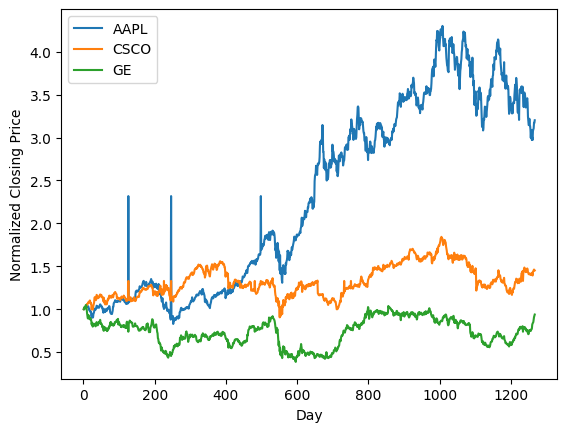

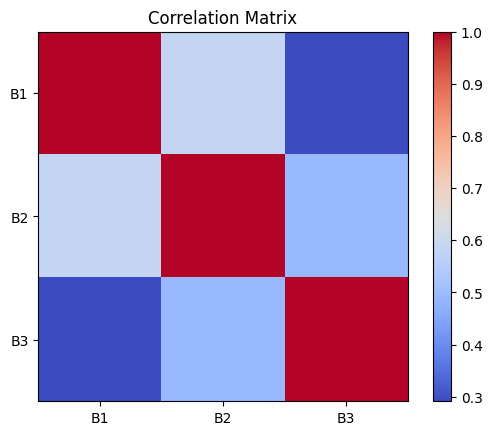

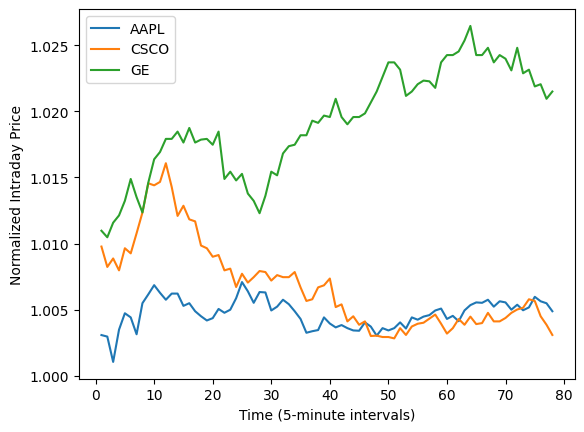

In [2]:
# Data analysis and visualization on stock price data
A = pd.concat([A1, A2,A3], axis=1)
A.isnull().sum().sum()

closing_prices = pd.concat([B1,B2,B3], axis=1)
normalized_closing_prices = closing_prices.div(closing_prices.iloc[0])


# Plot the normalized closing prices over time
plt.plot(normalized_closing_prices)
plt.xlabel('Day')
plt.ylabel('Normalized Closing Price')
plt.legend(['AAPL', 'CSCO', 'GE'])
plt.show()


# Compute and plot the correlation matrix
corr_matrix = normalized_closing_prices.corr()
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(3), ['B1', 'B2', 'B3'])
plt.yticks(np.arange(3), ['B1', 'B2', 'B3'])
plt.title('Correlation Matrix')
plt.show()


# Extract the intraday stock prices for a single day and normalize them
intraday_prices = pd.concat([A1.iloc[1,:], A2.iloc[1,:],A3.iloc[1,:]], axis=1)
normalized_intraday_prices = intraday_prices.div(list(closing_prices.iloc[0]), axis='columns')
normalized_intraday_prices.index = range(1,len(intraday_prices)+1)
# Plot the normalized intraday prices for a single day
plt.plot(normalized_intraday_prices)
plt.xlabel('Time (5-minute intervals)')
plt.ylabel('Normalized Intraday Price')
plt.legend(['AAPL', 'CSCO', 'GE'])
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_198464\2373288336.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  V1.cor = np.corrcoef(V1)
D:\Pythonanaconda\envs\New\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\Pythonanaconda\envs\New\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


((1267, 78), (1267,), (1267, 23), 1267)

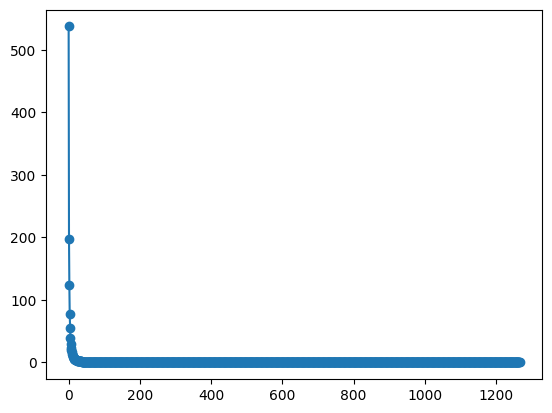

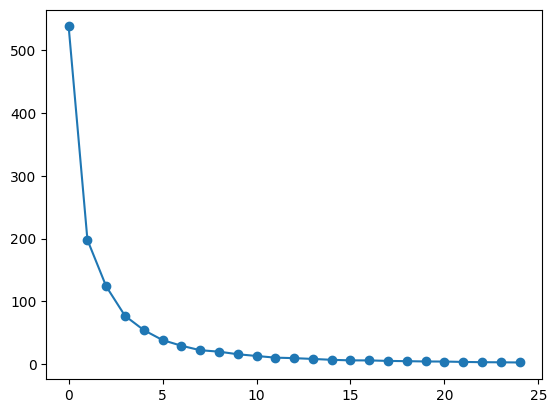

In [3]:
# Principal component analysis (PCA)
V1 = A1.apply(lambda x: (x-x.mean())/ x.std(), axis=1)
V1.shape
V1.cor = np.corrcoef(V1)
eigenvalues = np.linalg.eig(V1.cor)
plt.plot(eigenvalues[0],'-o')

plt.figure()
plt.plot(eigenvalues[0][:25],'-o')

pca1 = PCA(n_components=0.95)
U1=pca1.fit_transform(V1)
U1.shape

y1 = B1
y1.shape, U1.shape

N1 = V1.shape[0]
V1.shape, y1.shape, U1.shape, N1

In [4]:
# Preparing training and testing datasets for a machine learning model, and determining an appropriate size for the hidden layer
x_train1 = list()

for i in range(N1-63):
    vector12 = [U1[i], U1[i+1], U1[i+2]]
    vector12 = np.array(vector12).flatten()
    x_train1.append(vector12)

x_train1 = np.array(x_train1)
x_train1.shape

x_test1 = list()

for i in range(N1-63,N1-3):
    vector12 = [U1[i], U1[i+1], U1[i+2]]
    vector12 = np.array(vector12).flatten()
    x_test1.append(vector12)

x_test1 = np.array(x_test1)
x_test1.shape

y_train1 = y1[3:N1-60]
y_train1.shape

y_test1 = y1[N1-60:]
y_test1.shape


xscaler = StandardScaler()
x_train1 = xscaler.fit_transform(x_train1)
x_test1 = xscaler.transform(x_test1)


#Finding Hidden Layer Sizes (69 inputs, 1 output)
# The capacity of the network (in terms of number of weights) should not significantly exceed the amount of available information.
# Overly large networks relative to the size of the training data can lead to overfitting.
w = lambda h: 69*h + h + h*1 + 1
information_number = y_train1.size

h=0
while w(h) < information_number:
    h += 1

h,x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

(17, (1204, 69), (60, 69), (1204,), (60,))

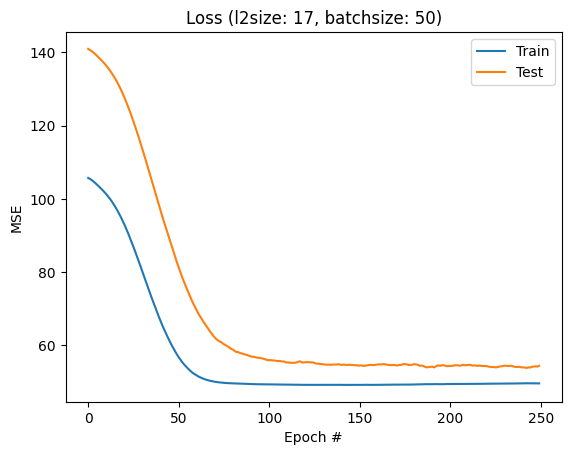

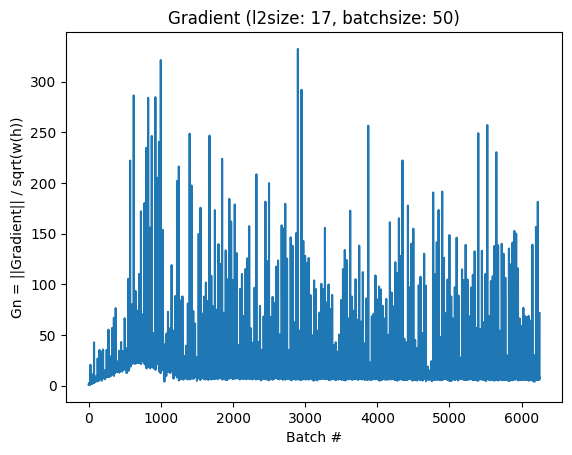

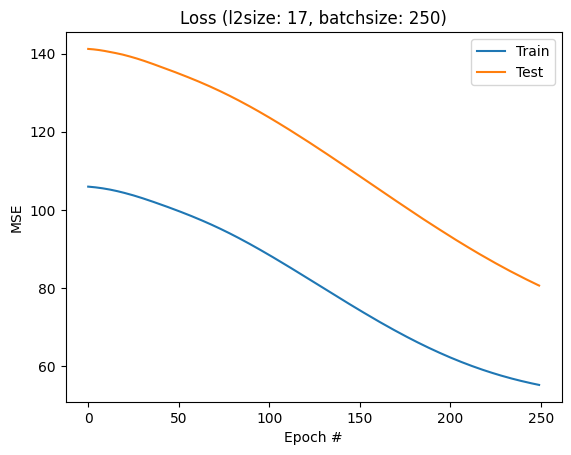

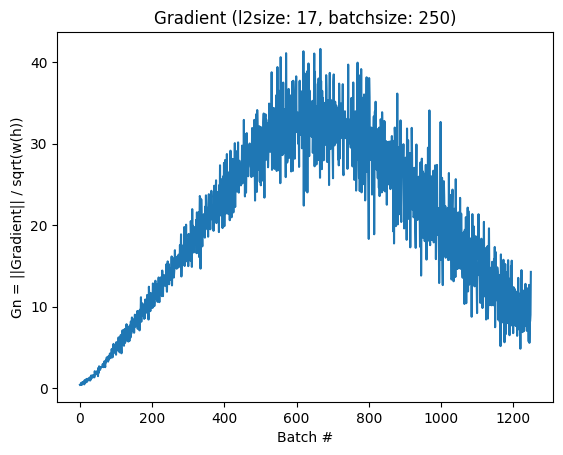

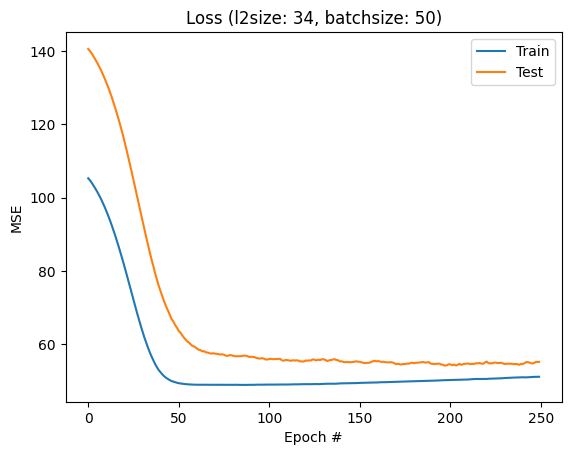

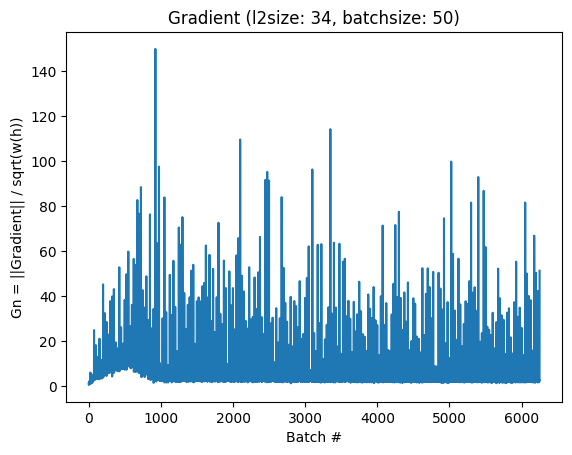

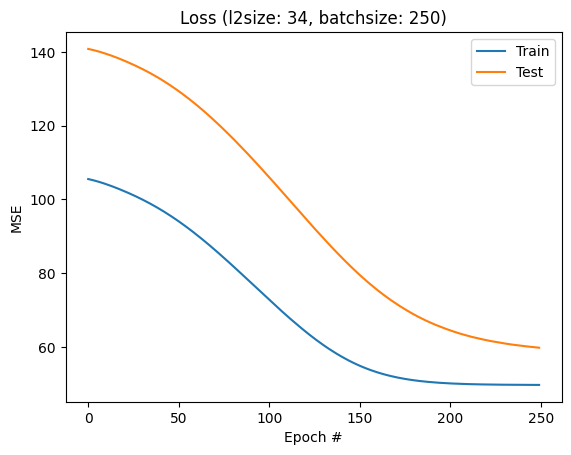

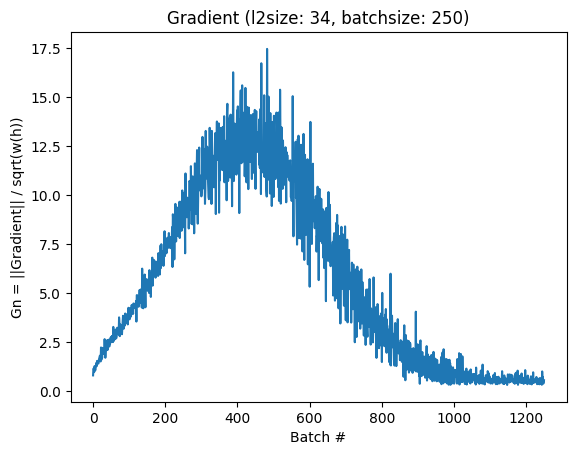

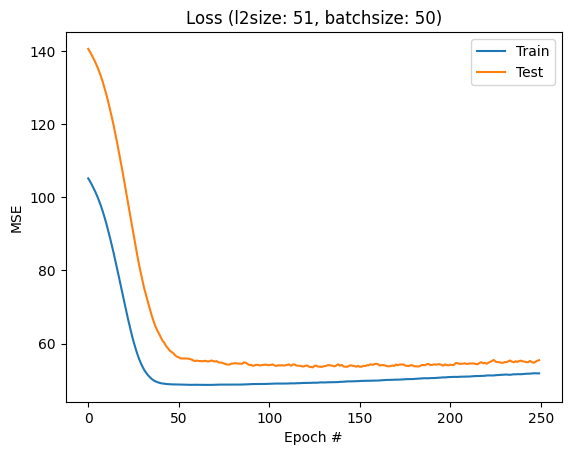

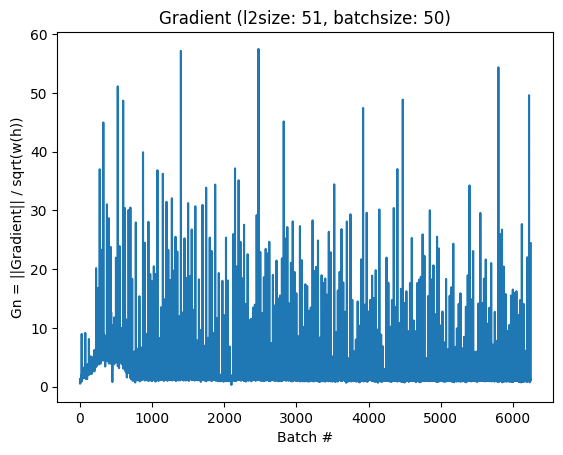

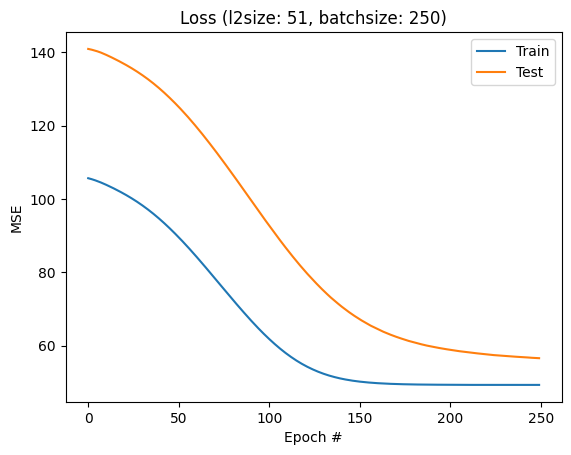

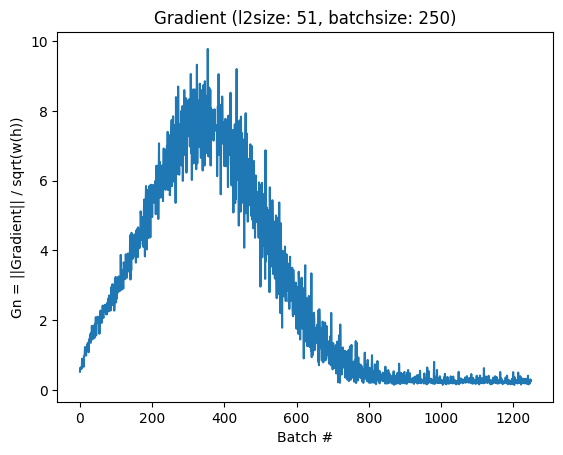

In [5]:
# Train a multi-layer perceptron (MLP) for different configurations, evaluates performance, and visualizes the results
# PREPARING MLP1
train_dataset1 = tf.data.Dataset.from_tensor_slices((x_train1, y_train1))
test_dataset1 = tf.data.Dataset.from_tensor_slices((x_test1, y_test1))

h1 = h
h2 = 2*h1
h3 = 3*h1
lr = 1e-3


#AUTOMATING MLP CREATION
def compute_loss(model, x, y):
    """
    This function, compute_loss, calculates the loss for a given set of inputs and labels using a specified model:
    The function takes three arguments: model, x, and y.
    model: The neural network model for which the loss is to be calculated.
    x: The input data to the model.
    y: The true labels corresponding to the input data.
    """
    return model.loss(model.predict(x, verbose= 0), y)

def train_mlp1(l2size, batch_size, epochs):
    """
    This code defines a function train_mlp1 to train a simple multi-layer perceptron (MLP) neural network:

    Setup and Model Initialization:
    Records the start time for runtime calculation.
    Prepares the training dataset with shuffling and batching.
    Creates an MLP with one hidden layer (l2size neurons) and one output layer.
    
    Model Compilation:
    Compiles the model using the Adam optimizer and mean squared error as the loss function.
    
    Training Loop:
    Iterates over the specified number of epochs.
    For each batch in the training data, it computes the loss and updates the model using gradient descent.
    Calculates and stores the mean squared error of the gradients (mse_grads).
    
    Performance Evaluation:
    At the end of each epoch, it computes and stores the training and testing losses.
    Keeps track of the epoch where the testing loss is minimal (k_star), and this loss is less than the corresponding training loss.
    
    Calculating Runtime and Returning Results:
    Calculates the total runtime of the training process.
    Returns the runtime, training and testing mean squared errors (MSE), gradient MSE, and the best epoch (k_star).
    """
    runtime = time.time()
    ds_train = train_dataset1.shuffle(1000).batch(batch_size)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(l2size, activation='relu', name='l2'),
        tf.keras.layers.Dense(1, activation='relu', name='l3')
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))
    train_losses = list()
    test_losses = list()
    mse_grads = list()
    least_loss = np.inf
    k_star = None
    
    for epoch in range(epochs):
        batch_losses = list()
        for x, y in ds_train:
            with tf.GradientTape() as tape:
                y_hat = model(x, training=True)
                batch_loss = model.loss(y, y_hat)
                
            gradients = tape.gradient(batch_loss, model.trainable_variables)
            model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            batch_losses.append(batch_loss.numpy())

            all_gradients = np.concatenate([grad.numpy().flatten() for grad in gradients])
            mse_grad = np.mean(all_gradients**2) / np.sqrt(len(all_gradients))
            mse_grads.append(mse_grad)

        epoch_train_loss = compute_loss(model, x_train1, y_train1)
        train_losses.append(epoch_train_loss)

        epoch_test_loss = compute_loss(model, x_test1, y_test1)
        test_losses.append(epoch_test_loss)

        if epoch_test_loss < least_loss and epoch_train_loss < epoch_test_loss:
            k_star = epoch
            least_loss = epoch_test_loss
            
    runtime = time.time() - runtime
    train_mse = np.sqrt(train_losses)
    test_mse = np.sqrt(test_losses)

    return runtime, train_mse, test_mse, mse_grads, k_star



hi = (h1, h2, h3)
batch_sizes = (50, 250)
epochs = 250
data1 = defaultdict(lambda: list())

# Plots the training and testing MSE over epochs for each configuration.
# Plots the mean squared error of the gradients to understand the training dynamics.
for h, m in product(hi, batch_sizes):
    runtime, train_mse, test_mse, mse_grads, k_star = train_mlp1(h, m, epochs)

    data1['l2size'].append(h)
    data1['batch'].append(m)
    data1['epoch'].append(epochs)
    data1['runtime'].append(runtime)
    data1['k*'].append(k_star)
    data1['train_mse*'].append(train_mse[k_star])
    data1['test_mse*'].append(test_mse[k_star])


    plt.figure()
    plt.plot(train_mse)
    plt.plot(test_mse)
    plt.legend("Train Test".split())
    plt.title(f"Loss (l2size: {h}, batchsize: {m})")
    plt.xlabel("Epoch #")
    plt.ylabel("MSE")

    plt.figure()
    plt.plot(mse_grads)
    plt.title(f"Gradient (l2size: {h}, batchsize: {m})")
    plt.xlabel("Batch #")
    plt.ylabel("Gn = ||Gradient|| / sqrt(w(h))")
    
summary_table1 = pd.DataFrame(data1)


In [6]:
summary_table1

,l2size,batch,epoch,runtime,k*,train_mse*,test_mse*
0,17,50,250,127.663616,242,49.678593,53.857515
1,17,250,250,62.065111,249,55.181254,80.609304
2,34,50,250,134.497177,197,50.234755,54.190355
3,34,250,250,61.971423,249,49.687880,59.784207
4,51,50,250,130.160512,124,49.335116,53.527527
5,51,250,250,64.049521,249,49.254960,56.547977


(60,)

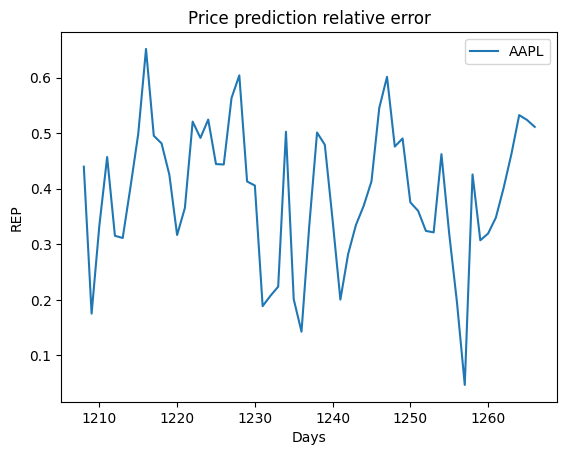

In [20]:
# l2 size = 51,batch size = 250,we get small test mse and small running time 
mlp1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(51, activation='relu', name='l2'),
    tf.keras.layers.Dense(1, activation='relu', name='l3')
])

mlp1.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))

history1 = mlp1.fit(x_train1, y_train1, epochs=250,batch_size= 250,
    validation_data = (x_test1, y_test1), verbose=0)

Zt1 = mlp1.predict(x_test1, verbose=0)
Zt1 = Zt1.flatten()
Rep1 = np.abs(Zt1-y_test1)/y_test1


plt.figure()
plt.plot(Rep1.iloc[:-1])
plt.title("Price prediction relative error")
plt.xlabel("Days")
plt.ylabel("REP")
plt.legend([stock_names[0]]);

Zt1.shape
y_test1.shape

C:\Users\lenovo\AppData\Local\Temp\ipykernel_198464\3040038002.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  V2.cor = np.corrcoef(V2)
D:\Pythonanaconda\envs\New\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\Pythonanaconda\envs\New\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


((1267, 78), (1267,), (1267, 23), 1267)

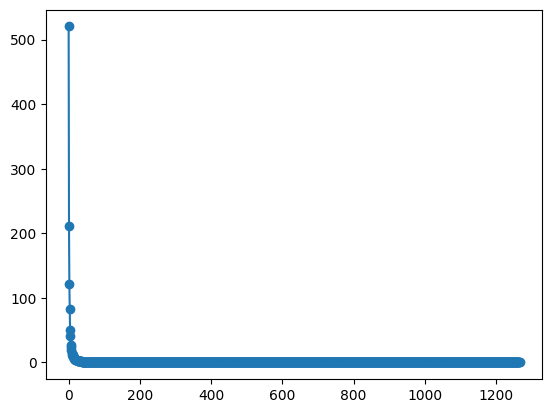

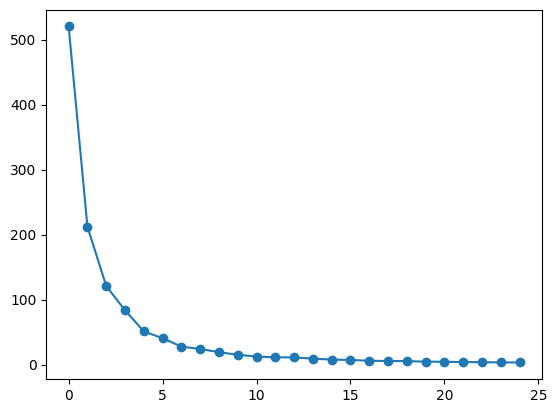

In [8]:
# MLP2
# processes and analyzes financial data for a stock (represented by A2), 
# Using normalization, correlation, eigenvalue decomposition, and principal component analysis (PCA)

V2 = A2.apply(lambda x: (x-x.mean())/ x.std(), axis=1)
V2.shape
V2.cor = np.corrcoef(V2)
eigenvalues = np.linalg.eig(V2.cor)
plt.plot(eigenvalues[0],'-o')
plt.figure()
plt.plot(eigenvalues[0][:25],'-o')
pca2 = PCA(n_components=0.95)
U2=pca2.fit_transform(V2)
U2.shape
y2 = B2
y2.shape, U2.shape
N2 = y2.shape[0]
V2.shape, y2.shape, U2.shape, N2

In [9]:
# MLP SETUP
# Sets up training and testing datasets for a second multi-layer perceptron (MLP) model and determines the size of the hidden layer

x_train2 = list()

for i in range(N2-63):
    vector12 = [U2[i], U2[i+1], U2[i+2]]
    vector12 = np.array(vector12).flatten()
    x_train2.append(vector12)

x_train2 = np.array(x_train2)
x_train2.shape
x_test2 = list()

for i in range(N2-63,N2-3):
    vector12 = [U2[i], U2[i+1], U2[i+2]]
    vector12 = np.array(vector12).flatten()
    x_test2.append(vector12)

x_test2 = np.array(x_test2)
x_test2.shape

y_train2 = y2[3:N2-60]
y_train2.shape

y_test2 = y2[N2-60:]
y_test2.shape


xscaler = StandardScaler()
x_train2 = xscaler.fit_transform(x_train2)
x_test2 = xscaler.transform(x_test2)


#Finding Hidden Layer Sizes (69 inputs, 1 output)
w = lambda h: 69*h + h + h*1 + 1
information_number = y_train1.size

h=0
while w(h) < information_number:
    h += 1

h

17

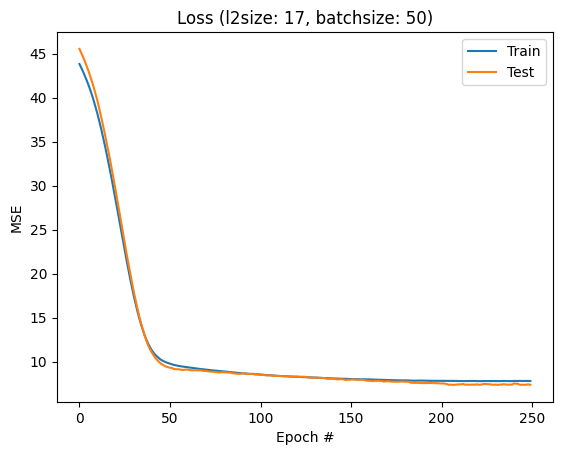

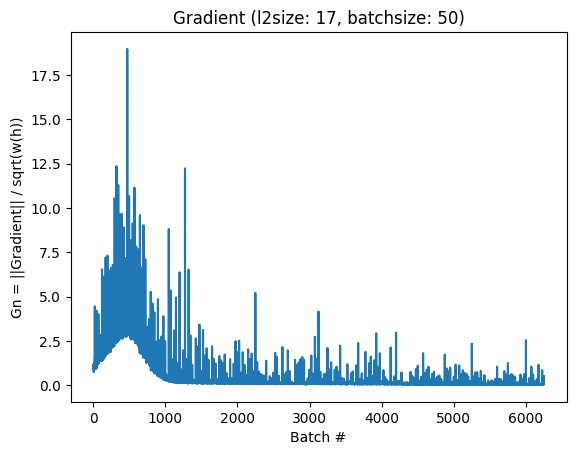

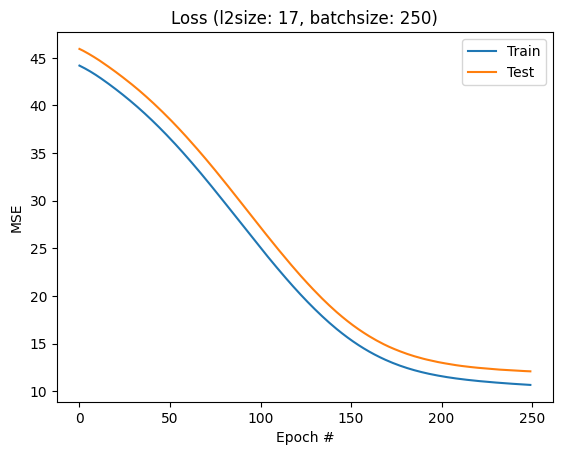

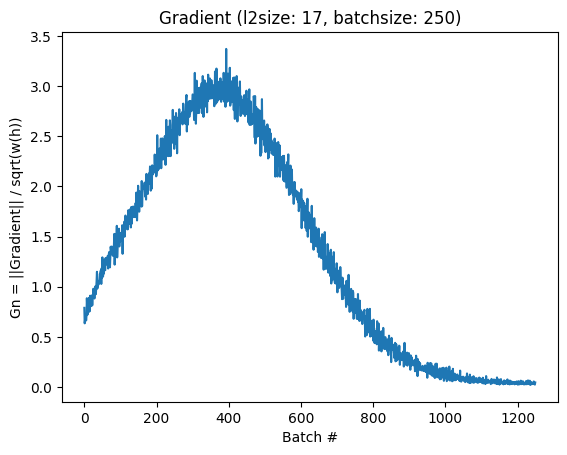

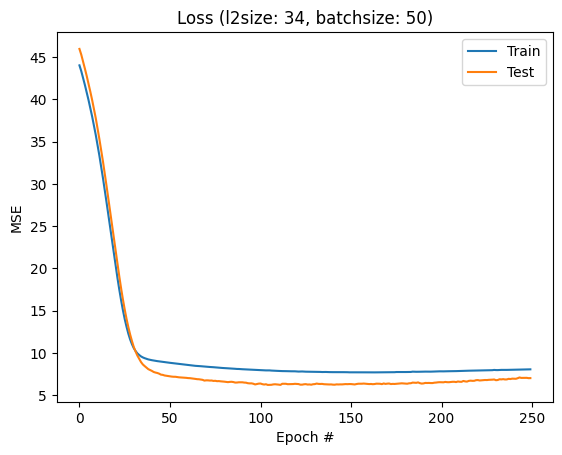

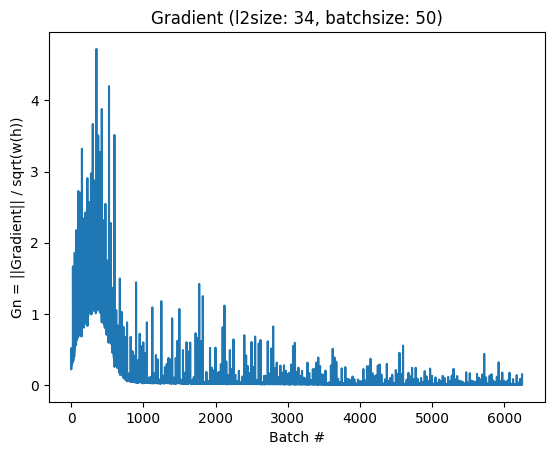

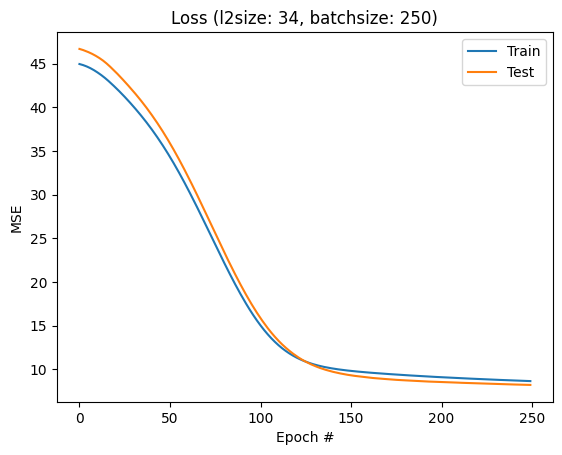

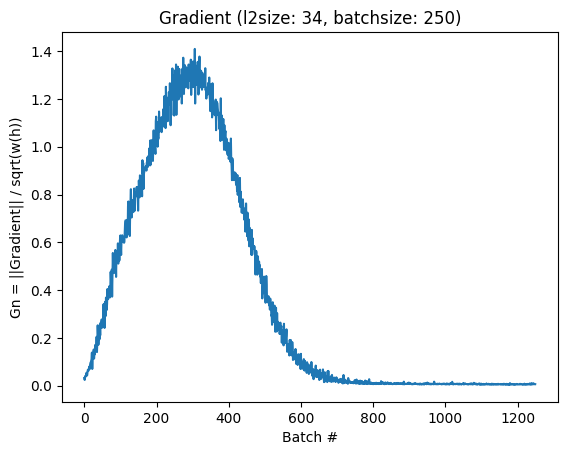

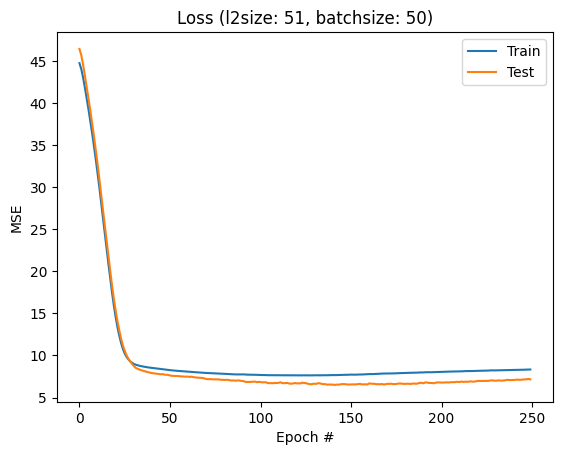

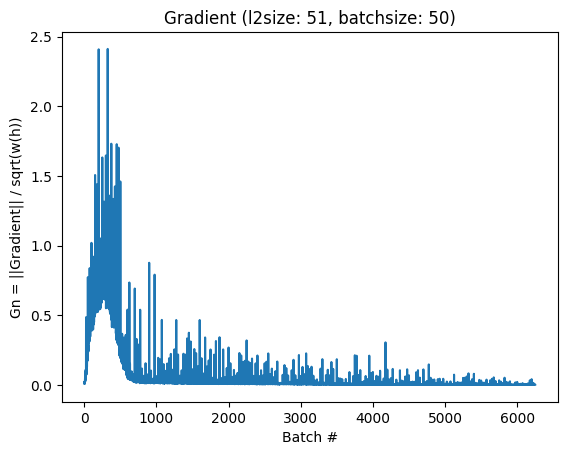

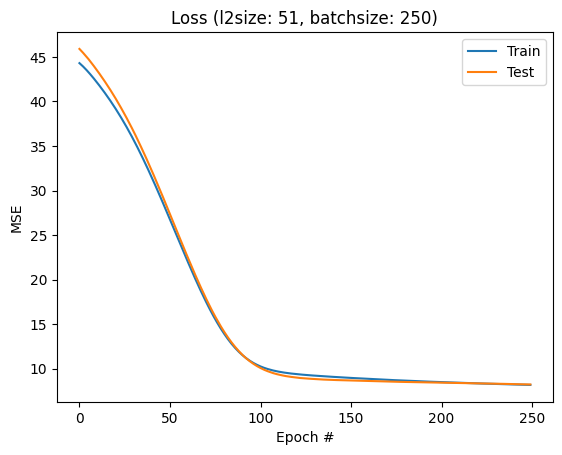

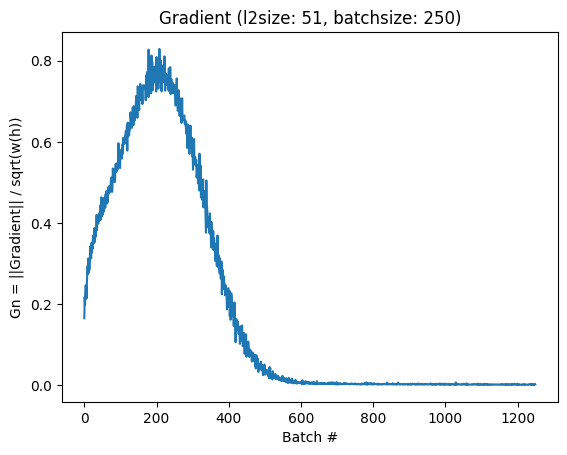

In [10]:
# MLP TUNING

# PREPARING MLP2
train_dataset2 = tf.data.Dataset.from_tensor_slices((x_train2, y_train2))
test_dataset2 = tf.data.Dataset.from_tensor_slices((x_test2, y_test2))

h1 = h
h2 = 2*h1
h3 = 3*h1
lr = 1e-3


# AUTOMATING MLP CREATION

def train_mlp2(l2size, batch_size, epochs = 250):
    runtime = time.time()
    ds_train = train_dataset2.shuffle(1000).batch(batch_size)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(l2size, activation='relu', name='l2'),
        tf.keras.layers.Dense(1, activation='relu', name='l3')
    ])

    model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))
    train_losses = list()
    test_losses = list()
    mse_grads = list()
    least_loss = np.inf
    k_star = None

    for epoch in range(epochs):
        batch_losses = list()
        for x, y in ds_train:
            with tf.GradientTape() as tape:
                y_hat = model(x, training=True)
                batch_loss = model.loss(y, y_hat)
            gradients = tape.gradient(batch_loss, model.trainable_variables)
            model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            batch_losses.append(batch_loss.numpy())
            all_gradients = np.concatenate([grad.numpy().flatten() for grad in gradients])
            mse_grad = np.mean(all_gradients**2) / np.sqrt(len(all_gradients))
            mse_grads.append(mse_grad)

        epoch_train_loss = compute_loss(model, x_train2, y_train2)
        train_losses.append(epoch_train_loss)

        epoch_test_loss = compute_loss(model, x_test2, y_test2)
        test_losses.append(epoch_test_loss)

        if epoch_test_loss < least_loss and epoch_train_loss < epoch_test_loss:
            k_star = epoch
            least_loss = epoch_test_loss

    runtime = time.time() - runtime
    train_mse = np.sqrt(train_losses)
    test_mse = np.sqrt(test_losses)
    return runtime, train_mse, test_mse, mse_grads, k_star


hi = (h1, h2, h3)
batch_sizes = (50, 250)
epochs = 250

data2 = defaultdict(lambda: list())

for h, m in product(hi, batch_sizes):
    runtime, train_mse, test_mse, mse_grads, k_star = train_mlp2(h, m, epochs)

    data2['l2size'].append(h)
    data2['batch'].append(m)
    data2['epoch'].append(epochs)
    data2['runtime'].append(runtime)
    data2['k*'].append(k_star)
    data2['train_mse*'].append(train_mse[k_star])
    data2['test_mse*'].append(test_mse[k_star])

    plt.figure()
    plt.plot(train_mse)
    plt.plot(test_mse)
    plt.legend("Train Test".split())
    plt.title(f"Loss (l2size: {h}, batchsize: {m})")
    plt.xlabel("Epoch #")
    plt.ylabel("MSE")

    plt.figure()
    plt.plot(mse_grads)
    plt.title(f"Gradient (l2size: {h}, batchsize: {m})")
    plt.xlabel("Batch #")
    plt.ylabel("Gn = ||Gradient|| / sqrt(w(h))")

summary_table2 = pd.DataFrame(data2)



In [11]:
summary_table2

,l2size,batch,epoch,runtime,k*,train_mse*,test_mse*
0,17,50,250,134.127381,134,8.153011,8.164498
1,17,250,250,67.838660,249,10.651766,12.078873
2,34,50,250,133.645472,30,10.554143,10.689807
3,34,250,250,73.264318,124,10.936625,10.958558
4,51,50,250,146.435634,28,9.300041,9.305213
5,51,250,250,78.022167,249,8.182169,8.233798


(60,)

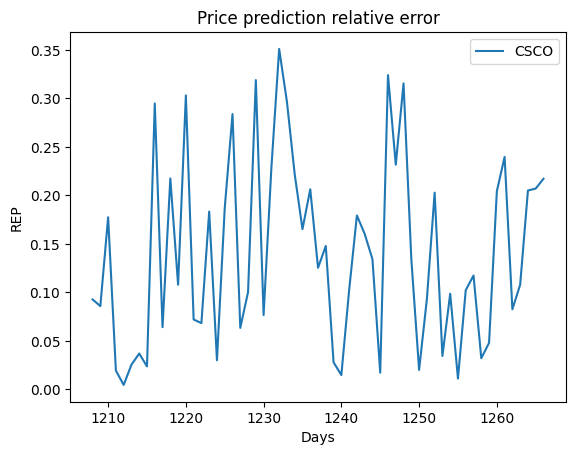

In [19]:
# MLP2
# Choosing l2size = 51, batch size = 250, since we have low test_mse and the running time is small
mlp2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(51, activation='relu', name='l2'),
  tf.keras.layers.Dense(1, activation='relu', name='l3')
])

mlp2.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))
history2 = mlp2.fit(x_train2, y_train2, epochs=250,batch_size= 250,
    validation_data = (x_test2, y_test2), verbose=0)

Zt2 = mlp2.predict(x_test2, verbose=0)
Zt2 = Zt2.flatten()
Rep2 = np.abs(Zt2-y_test2)/y_test2


plt.figure()
plt.plot(Rep2.iloc[:-1])
plt.title("Price prediction relative error")
plt.xlabel("Days")
plt.ylabel("REP")
plt.legend([stock_names[1]]);

Zt2.shape
y_test2.shape

C:\Users\lenovo\AppData\Local\Temp\ipykernel_198464\1595761281.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  V3.cor = np.corrcoef(V3)
D:\Pythonanaconda\envs\New\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\Pythonanaconda\envs\New\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


((1267, 78), (1267,), (1267, 24), 1267)

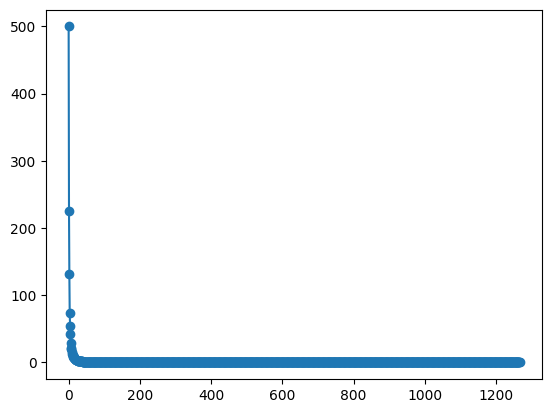

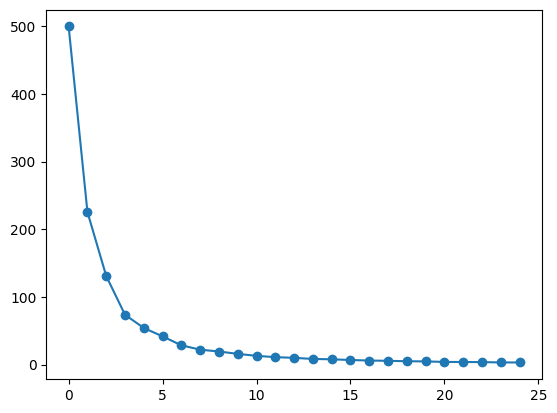

In [13]:
# MLP3
# PCA

V3 = A3.apply(lambda x: (x-x.mean())/ x.std(), axis=1)
V3.shape
V3.cor = np.corrcoef(V3)
eigenvalues = np.linalg.eig(V3.cor)
plt.plot(eigenvalues[0],'-o')

plt.figure()
plt.plot(eigenvalues[0][:25],'-o')

pca3 = PCA(n_components=0.95)
U3=pca3.fit_transform(V3)
U3.shape

y3 = B3
y3.shape, U3.shape

N3 = y3.shape[0]
V3.shape, y3.shape, U3.shape, N3

In [14]:
# MLP SETUP

x_train3 = list()

for i in range(N3-63):
    vector12 = [U3[i], U3[i+1], U3[i+2]]
    vector12 = np.array(vector12).flatten()
    x_train3.append(vector12)

x_train3 = np.array(x_train3)
x_train3.shape

x_test3 = list()

for i in range(N3-63,N3-3):
    vector12 = [U3[i], U3[i+1], U3[i+2]]
    vector12 = np.array(vector12).flatten()
    x_test3.append(vector12)

x_test3 = np.array(x_test3)
x_test3.shape

y_train3 = y3[3:N3-60]
y_train3.shape

y_test3 = y3[N3-60:]
y_test3.shape


xscaler = StandardScaler()
x_train3 = xscaler.fit_transform(x_train3)
x_test3 = xscaler.transform(x_test3)


#Finding Hidden Layer Sizes (72 inputs, 1 output)
w = lambda h: 72*h + h + h*1 + 1
information_number = y_train1.size

h=0
while w(h) < information_number:
    h += 1

h

17

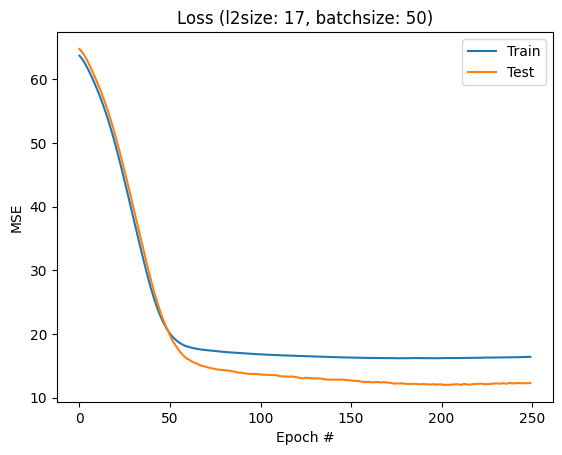

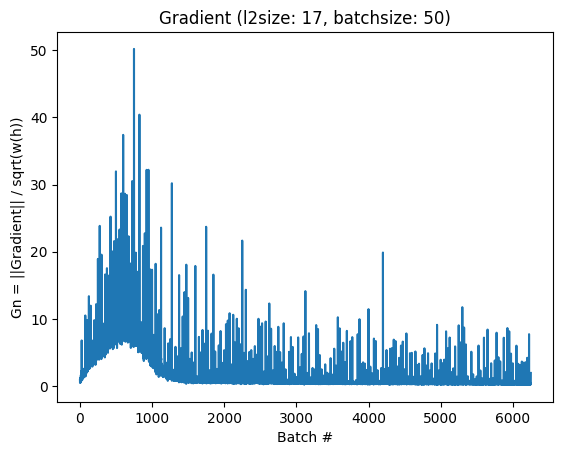

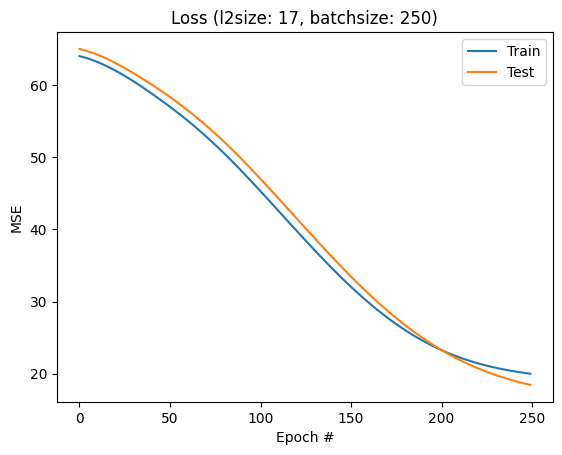

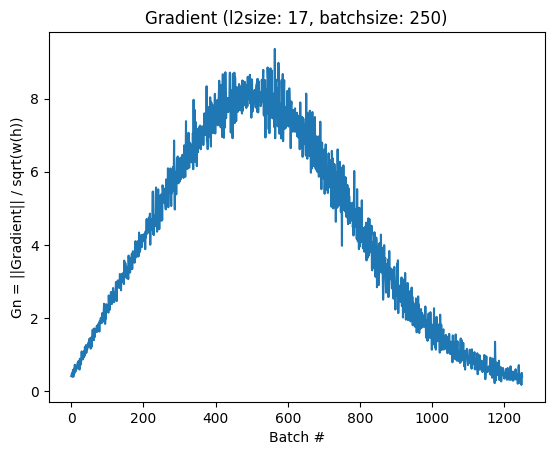

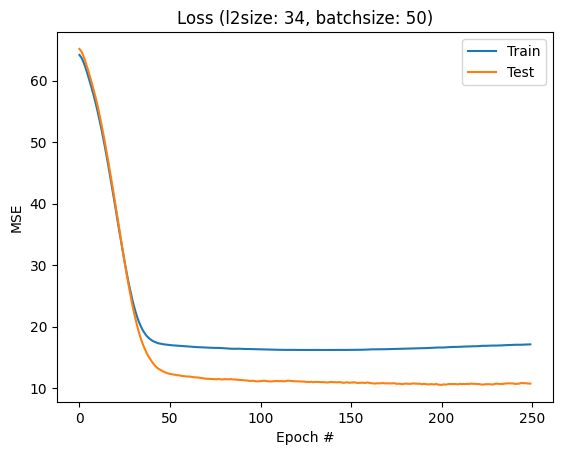

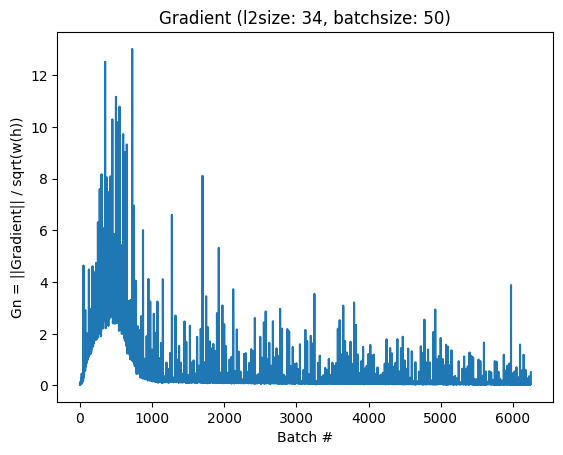

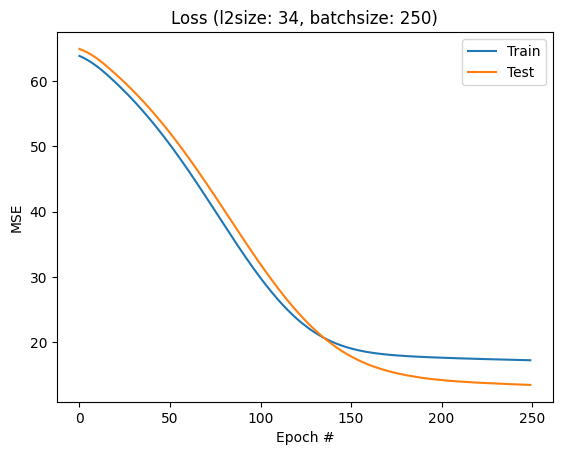

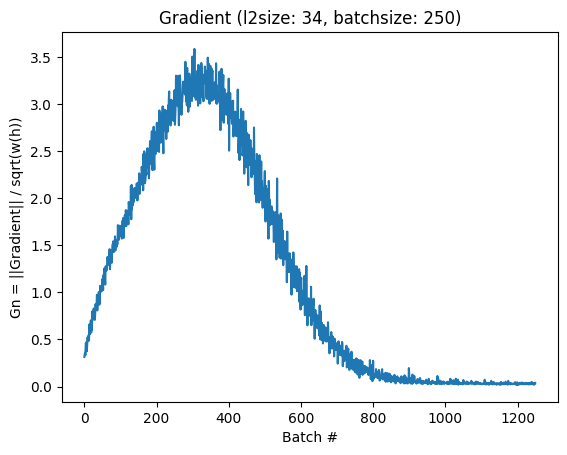

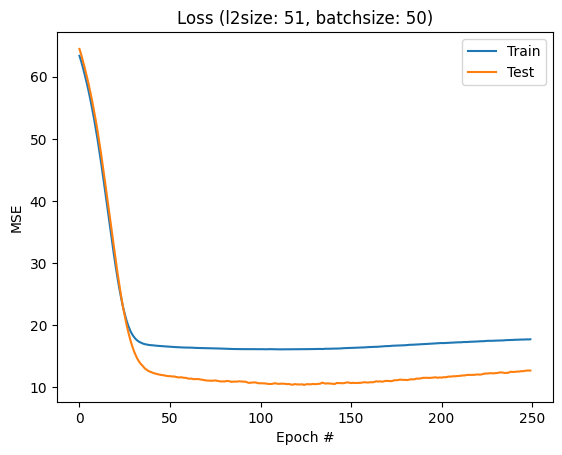

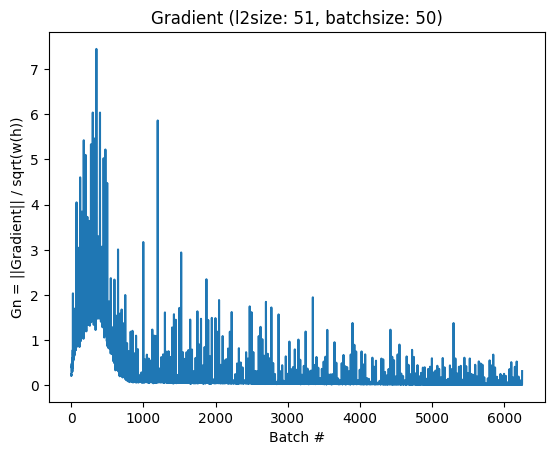

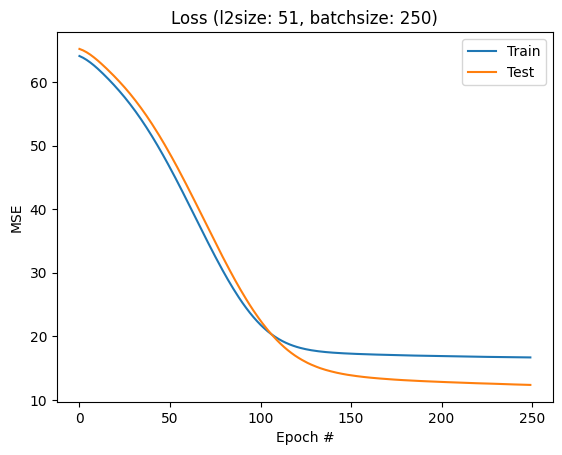

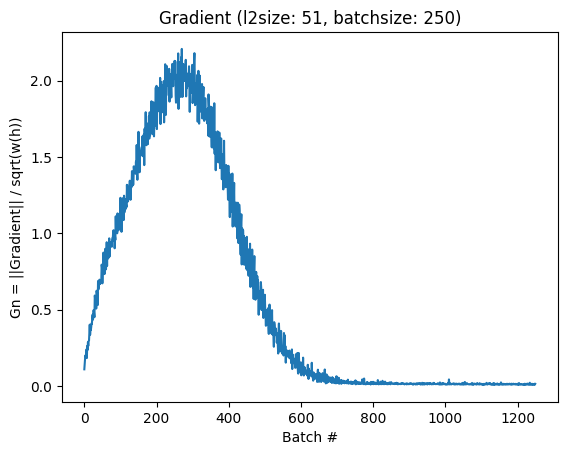

In [15]:
# MLP TUNING
#PREPARING MLP3
train_dataset3 = tf.data.Dataset.from_tensor_slices((x_train3, y_train3))
test_dataset3 = tf.data.Dataset.from_tensor_slices((x_test3, y_test3))

h1 = h
h2 = 2*h1
h3 = 3*h1
lr = 1e-3


#AUTOMATING MLP CREATION

def train_mlp3(l2size, batch_size, epochs = 250):
    runtime = time.time()
    ds_train = train_dataset3.shuffle(1000).batch(batch_size)
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(l2size, activation='relu', name='l2'),
    tf.keras.layers.Dense(1, activation='relu', name='l3')
    ])

    model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))
    train_losses = list()
    test_losses = list()
    mse_grads = list()
    least_loss = np.inf
    k_star = None

    for epoch in range(epochs):
        batch_losses = list()
        for x, y in ds_train:
            with tf.GradientTape() as tape:
                y_hat = model(x, training=True)
                batch_loss = model.loss(y, y_hat)
            gradients = tape.gradient(batch_loss, model.trainable_variables)
            model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            batch_losses.append(batch_loss.numpy())

            all_gradients = np.concatenate([grad.numpy().flatten() for grad in gradients])
            mse_grad = np.mean(all_gradients**2) / np.sqrt(len(all_gradients))
            mse_grads.append(mse_grad)

        epoch_train_loss = compute_loss(model, x_train3, y_train3)
        train_losses.append(epoch_train_loss)
        epoch_test_loss = compute_loss(model, x_test3, y_test3)
        test_losses.append(epoch_test_loss)

        if epoch_test_loss < least_loss and epoch_train_loss < epoch_test_loss:
            k_star = epoch
            least_loss = epoch_test_loss



    runtime = time.time() - runtime
    train_mse = np.sqrt(train_losses)
    test_mse = np.sqrt(test_losses)
    return runtime, train_mse, test_mse, mse_grads, k_star



hi = (h1, h2, h3)
batch_sizes = (50, 250)
epochs = 250

data3 = defaultdict(lambda: list())

for h, m in product(hi, batch_sizes):
    runtime, train_mse, test_mse, mse_grads, k_star = train_mlp3(h, m, epochs)

    data3['l2size'].append(h)
    data3['batch'].append(m)
    data3['epoch'].append(epochs)
    data3['runtime'].append(runtime)
    data3['k*'].append(k_star)
    data3['train_mse*'].append(train_mse[k_star])
    data3['test_mse*'].append(test_mse[k_star])

    plt.figure()
    plt.plot(train_mse)
    plt.plot(test_mse)
    plt.legend("Train Test".split())
    plt.title(f"Loss (l2size: {h}, batchsize: {m})")
    plt.xlabel("Epoch #")
    plt.ylabel("MSE")

    plt.figure()
    plt.plot(mse_grads)
    plt.title(f"Gradient (l2size: {h}, batchsize: {m})")
    plt.xlabel("Batch #")
    plt.ylabel("Gn = ||Gradient|| / sqrt(w(h))")

summary_table3 = pd.DataFrame(data3)



In [16]:
summary_table3

,l2size,batch,epoch,runtime,k*,train_mse*,test_mse*
0,17,50,250,140.499436,48,20.934827,21.055039
1,17,250,250,66.324075,200,23.252279,23.263760
2,34,50,250,131.090001,24,32.085748,32.168639
3,34,250,250,64.841992,135,20.649449,20.649674
4,51,50,250,131.084418,23,24.413469,24.717015
5,51,250,250,70.707894,105,20.557860,20.662777


(60,)

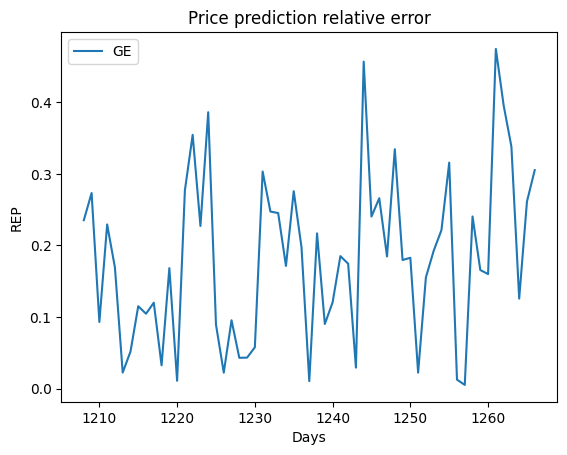

In [18]:
# MLP3
# Choosing l2size = 34, batch size = 250
mlp3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(34, activation='relu', name='l2'),
  tf.keras.layers.Dense(1, activation='relu', name='l3')
])

mlp3.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))
history3 = mlp3.fit(x_train3, y_train3, epochs=250,batch_size= 250,
    validation_data = (x_test3, y_test3), verbose=0)

Zt3 = mlp3.predict(x_test3, verbose=0)
Zt3 = Zt3.flatten()
Rep3 = np.abs(Zt3-y_test3)/y_test3


plt.figure()
plt.plot(Rep3.iloc[:-1])
plt.title("Price prediction relative error")
plt.xlabel("Days")
plt.ylabel("REP")
plt.legend([stock_names[2]]);

Zt3.shape
y_test3.shape